In [ ]:
import ddm_data_simulation as ddm_sim
import scipy as scp
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
#import kde_class
import multiprocessing as mp
import psutil
import pickle 
import os
import re

import kde_training_utilities as kde_util
import kde_class as kde

In [ ]:
# Simulate a couple samples
# Standard DDM
my_samples = ddm_sim.ddm_simulate(v = -3, 
                                  a = 3, 
                                  w = 0.5, 
                                  s = 1,
                                  delta_t = 0.01,
                                  max_t = 20,
                                  n_samples = 10000,
                                  print_info = True)

In [ ]:
# Set up KDE 
my_log_kdes = kde.logkde(my_samples)
# evals, __ = my_log_kdes.kde_eval(where  = np.expand_dims(np.linspace(0.00001, 10, num = 500),
#                                                       axis = 1), 
#                               which = [1, -1])

#evals = my_log_kdes.kde_eval_2(my_samples[:2])

my_log_kdes.bandwidths

In [ ]:
my_log_kdes.data
my_choices = np.unique(my_log_kdes.data[1])

In [ ]:
sum(my_log_kdes.data['choice_proportions'])

In [ ]:
plt.hist(np.exp(evals))

In [ ]:
my_log_kdes.data['choices'].index(-1)

In [ ]:
#kde_samples = 
samples = my_log_kdes.kde_sample(n_samples = 10000)
plt.hist(samples[0], color = 'green', alpha = 0.3, density = True, bins = 50)
plt.hist(my_samples[0], color = 'blue', alpha = 0.3, density = True, bins = 50)

In [ ]:
# Plot 
plt.hist(my_samples[0] * my_samples[1], bins = 50, density = True)
plt.plot(my_log_kdes.data[0][1] * np.linspace(0.00001, 10, num = 500), np.exp(evals[0]))
plt.plot(my_log_kdes.data[1][1] * np.linspace(0.00001, 10, num = 500), np.exp(evals[1]))

In [ ]:
# Simulate a couple samples
# DDM with arbitrary boundary
# Define boundary function
def my_boundary(t = 1, 
                c1 = 1,
                c2 = 1):
    return [- c2 - np.exp(- t * c1), + c2 + np.exp(- t * c1)]

# Plot boundaries for illustration
t_space = np.linspace(0.000001, 10, num = 200)
bounds = np.zeros((len(t_space), 2))

for i in range(0,len(t_space),1):
    bounds[i,:] = my_boundary(t = t_space[i], c1 = 1, c2 = 0.5)
    
plt.plot(np.linspace(0.000001, 10, num = 200), bounds[:, 0])
plt.plot(np.linspace(0.000001, 10, num = 200), bounds[:, 1])

In [ ]:
# Get samples
my_samples_flexb  = ddm_sim.ddm_flexbound_simulate(v = 0,
                                                   w = 0.5, 
                                                   s = 1,
                                                   delta_t = 0.001,
                                                   max_t = 20,
                                                   n_samples = 10000,
                                                   print_info = True,
                                                   boundary_fun = my_boundary,
                                                   c1 = 1,
                                                   c2 = 0.5)

In [ ]:
# Set up KDE 
my_log_kdes  = kde_class.logkde()
my_log_kdes.attach_data_from_simulator(simulator_data = my_samples_flexb)
my_log_kdes.generate_base_kdes()
evals = my_log_kdes.kde_eval(where  = np.expand_dims(np.linspace(0.00001, 10, num = 500),
                                                     axis = 1), 
                             which = [1, -1])

In [ ]:
# Plot 
plt.hist(my_samples_flexb[0] * my_samples_flexb[1], bins = 50, density = True)
plt.plot(my_log_kdes.data[0][1] * np.linspace(0.00001, 10, num = 500), np.exp(evals[0]))
plt.plot(my_log_kdes.data[1][1] * np.linspace(0.00001, 10, num = 500), np.exp(evals[1]))

In [ ]:
# Simulate: RACE MODEL
def my_boundary_race(t = 0, height = 1):
    return height

# Get samples
my_samples_race  = ddm_sim.race_model(v = np.array([1, 0.5, 0, 0, 0], ndmin = 2).T,
                                      w = np.array([0, 0, 0, 0, 0], ndmin = 2).T, 
                                      s = 1,
                                      delta_t = 0.001,
                                      max_t = 20,
                                      n_samples = 3000,
                                      print_info = True,
                                      boundary_fun = my_boundary_race,
                                      height = 2)

In [ ]:
# Make kde 
choices = np.unique(my_samples_race[1])
my_race_kdes = kde_class.logkde()
my_race_kdes.attach_data_from_simulator(simulator_data = my_samples_race)
my_race_kdes.generate_base_kdes()
evals = my_race_kdes.kde_eval(where  = np.expand_dims(np.linspace(0.00001, 10, num = 500),
                                                     axis = 1), 
                             which = choices)

In [ ]:
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[0]), color = 'blue')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[1]), color = 'green')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[2]), color = 'yellow')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[3]), color = 'orange')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[4]), color = 'red')

In [ ]:
plt.hist(my_samples_race[0][my_samples_race[1] == 0], bins = 30, density = True, alpha = 0.3)
plt.hist(my_samples_race[0][my_samples_race[1] == 1], bins = 30, density = True, alpha = 0.3)
plt.hist(my_samples_race[0][my_samples_race[1] == 2], bins = 30, density = True, alpha = 0.3)

In [ ]:
my_race_kdes.data

In [ ]:
my_linspace = np.linspace(0.00001, 10, num = 500)
diff = my_linspace[1] - my_linspace[0]

my_sum = 0
for j in range(0, len(evals), 1):
    for i in range(0, len(my_linspace), 1):
        my_sum += diff * np.exp(evals[j][i])

In [ ]:
a = [1,2,-3]


In [ ]:
np.maximum(a, 0)

In [ ]:
# Simulate: lca
# Get samples
my_samples_lca  = ddm_sim.lca(v = np.array([1, 0.5, 0.0, 0.0, 0.0], ndmin = 2).T,
                              w = np.array([0.0, 0.0, 0.0, 0.0, 0.0], ndmin = 2).T, 
                              a = 2,
                              b = 1.0,
                              g = 0.1,
                              s = 1.0,
                              delta_t = 0.001,
                              max_t = 20,
                              n_samples = 3000,
                              print_info = True)

In [ ]:
# Make kde 
choices = np.unique(my_samples_lca[1])
my_lca_kdes = kde_class.logkde()
my_lca_kdes.attach_data_from_simulator(simulator_data = my_samples_lca)
my_lca_kdes.generate_base_kdes()
evals = my_lca_kdes.kde_eval(where  = np.expand_dims(np.linspace(0.00001, 10, num = 500),
                                                     axis = 1), 
                             which = choices)

In [ ]:
# Plot
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[0]), color = 'blue')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[1]), color = 'green')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[2]), color = 'yellow')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[3]), color = 'orange')
plt.plot(np.linspace(0.00001, 10, num = 500), np.exp(evals[4]), color = 'red')

In [ ]:
# Save a dictionary into a pickle file.

pickle.dump([1, 2, my_lca_kdes], open( "save.p", "wb" ) )


In [ ]:
test = pickle.load( open( "data_storage/kde/base_simulations/ddm_03_31_19_22_10_204cceb59a542311e9940f91dddba7e031.pickle", "rb" ) )

In [ ]:
test

In [ ]:
choices = np.array([2,3,4,2])
choices[np.where(choices == 2)]

In [ ]:
mp.cpu_count(logical = False)

In [ ]:
[(1,0.5, 1, 0.001, 20, i) for i in range(1000, 8001, 1000)]
# v = 0, 
#                          a = 1, 
#                          w = 0.5, 
#                          s = 1,
#                          delta_t = 0.001,
#                          max_t = 20,
#                          n_samples = 10000,
#                          print_info = True)

In [ ]:
from  multiprocessing import Process
from  multiprocessing import Pool

with Pool(processes = 4) as pool:
    res = pool.starmap(ddm_sim.ddm_simulate,[(0,1,0.5, 1, 0.001, 20, i) for i in range(1000, 8001, 1000)])

In [ ]:
my_log_kdes.simulator_info

In [ ]:
my_samples[0] + my_samples[0] + my_samples[0]

In [ ]:
print(my_boundary)

In [ ]:
import inspect
code, line_no = inspect.getsourcelines(my_boundary)
print(''.join(code))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_trisurf(np.random.uniform(high=1, low = 0, size = 10000),
                np.random.uniform(high=1, low = 0, size = 10000),
                np.random.uniform(high=1, low = 0, size = 10000))

In [ ]:
my_samples[1].shape

In [ ]:
# try getting data from the kde
my_log_kdes.kde_sample(n_samples = 2000, which = [-1, 1])[0]

In [ ]:
a = np.ones((10,5))
pda = pd.DataFrame(data= a, columns = ['a', 'b', 'c', 'd', 'e'] )

In [ ]:
['a', 'b', 'c', 'd', 'e'].index('a')

In [ ]:
pda.iloc[0:2, ['a', 'b', 'c', 'd', 'e'].index('a')] = 10

In [ ]:
pda

In [ ]:
pda[['a']].iloc[1:3] = 50

In [ ]:
pda

In [ ]:
pda.loc[2:, ['a','b']]  = ['a','b']

In [ ]:
pda.loc[2:, ]

In [ ]:
pda.iloc[0:3, 1:2]

In [ ]:
a = 'helloooooo'

In [ ]:
a[-4:]

In [ ]:
os.getcwd()

In [ ]:
from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)
sim_dat = pickle.load( open( from_folder + file_list[2530], "rb" ) )
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)

In [ ]:

text = 'ddm_aisdojasjdkasjd'
simulator = ''
for char_ in text:
    if char_ == '_':
        break
    simulator += char_

In [ ]:
tmp_file = 'ddm_04_01_19_15_54_32f7966dee54b711e9a642538a99cae90e.csv'
pd.read_csv(to_folder + tmp_file, index_col = 0)

In [ ]:
plt.hist(sim_dat[0] * sim_dat[1], bins =  50)

In [ ]:
sim_dat

In [ ]:
from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)

cnt = 0
forensics_data = dict(v = [], a = [])
for file_ in file_list:
    sim_dat = pickle.load( open( from_folder + file_, "rb" ) )
    if np.sum(sim_dat[1] == 1) == 0 or np.sum(sim_dat[1] == -1) == 0:
        print('cnt', cnt)
        print('no data for some choice')
        print(sim_dat[2])
        forensics_data['v'].append(sim_dat[2]['v:'])
        forensics_data['a'].append(sim_dat[2]['a'])
        
#     print('count:', cnt)
#     print('c minus 1:', kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1]))
#     print('c 1:',kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == 1]))
    cnt += 1
    if cnt % 1000 == 0: 
        print('1000 files opened')
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)


#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1])

In [ ]:
#pickle.dump([1, 2, my_lca_kdes], open( "save.p", "wb" ) )


from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)

cnt = 0
forensics_data = dict(v = [], a = [])
for file_ in file_list:
    sim_dat = pickle.load( open( from_folder + file_, "rb" ) )
    sim_dat[2]['v'] = sim_dat[2]['v:']
    del sim_dat[2]['v:']
    sim_dat[2]['possible_choices'] = [-1., 1.]
    
    pickle.dump(sim_dat, open( from_folder + file_[:21] + '_' + file_[21:], "wb" ) )
    print(cnt)
    cnt += 1
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)


#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1])

In [ ]:
#pickle.dump([1, 2, my_lca_kdes], open( "save.p", "wb" ) )


from_folder = os.getcwd() + '/data_storage/kde/base_simulations/'
file_list = os.listdir(from_folder)

cnt = 0
forensics_data = dict(v = [], a = [])
for file_ in file_list:
    char_cnt = 0
    for i in file_[::-1]:
        if i == '_':
            print(char_cnt)
            break
        char_cnt += 1
    
    if char_cnt == 41:
        os.remove(from_folder + file_)
        print('removed:', file_)
    else:
        print('kept:', file_)
#     sim_dat = pickle.load( open( from_folder + file_, "rb" ) )
#     sim_dat[2]['v'] = sim_dat[2]['v:']
#     del sim_dat[2]['v:']
#     sim_dat[2]['possible_choices'] = [-1., 1.]
    
#     pickle.dump(sim_dat, open( from_folder + file_[:21] + '_' + file_[21:], "wb" ) )
    
    print(cnt)
    cnt += 1
#to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
# a = kde_util.generate_training_base_kde(from_folder = from_folder,
#                                         to_folder = to_folder)


#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == -1])





In [ ]:
file_list

In [ ]:
#kde.bandwidth_silverman(sim_dat[0][sim_dat[1] == 1])
file_name = 'ddm_04_03_19_02_46_31_36eeac3e55dc11e98defd58e25f6fa70.pickle'
from_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/'
#file_list = os.listdir(from_folder)
sim_dat = pd.read_pickle(from_folder + file_name)
#sim_dat = pickle.load( open( from_folder + file_name, "rb" ) )

In [ ]:
sim_dat = pd.read_pickle(os.getcwd() + '/data_storage/kde/kde_training_dat/ddm_04_06_19_20_52_36/batch_37016.pickle')

In [ ]:
len(np.unique(sim_dat['v']))

In [ ]:
sim_dat.sample(frac = 1).reset_index(drop = True)
sim_dat['group'] = np.repeat([1,2,3], 1000)
sim_dat[sim_dat['group'] == 1]

In [ ]:
sim_dat.drop(['group'], axis = 1)

In [ ]:
new_sim_dat = sim_dat.groupby('group')

In [ ]:
new_sim_dat.get_group(1).drop(['group'], axis = 1)

In [ ]:
plt.scatter(forensics_data['v'], forensics_data['a'])

In [ ]:
def bandwidth_silverman(sample = [0,0,0]):
    std = np.std(sample)
    n = len(sample)
    return np.power((4/3), 1/5) * std * np.power(n, (-1/5))

In [ ]:
# Load some file and extract column names to be kept going forward
test = pickle.load(open(os.getcwd() + '/data_storage/kde/kde_base_dat/kde_ddm_flexbound_fff84ea0681f11e98948897ab099f7d4.pickle', 'rb'))
col_names = list(test)
test_frame = pd.DataFrame(columns = ['cols_to_keep', 'kde_type', 'bandwidth_rule', 'mixture'])
test_frame.loc[0] = [col_names[:8], test['kde_type'][0], test['bandwidth_rule'][0], test['mixture'][0]]

In [ ]:
# Write meta file that stores the columns we are interested in in a csv
test_frame.to_csv(os.getcwd() + '/data_storage/kde/kde_base_dat/meta_data.csv', index = False)

In [ ]:
# Initializations
meta = pd.read_csv(os.getcwd() + '/data_storage/kde/kde_base_dat/meta_data.csv')
simulator = 'kde_ddm'
to_folder = os.getcwd() + '/data_storage/kde/kde_base_dat/' # + simulator + '_' + 'test_full' 
test_folder = os.getcwd() + '/data_storage/kde/kde_training_dat/' + simulator + '_' + 'reduced_files' 
final_folder = os.getcwd() + '/data_storage/kde/kde_training_dat/' + simulator + '_' + 'final_train_test'
file_list = os.listdir(to_folder)

In [ ]:
# Make reduced data (dropping unnecessary column w.r.t network training)
cnt = 0
for file_ in file_list:
    if file_ != 'meta_data.csv':
        my_mat = pickle.load(open(to_folder + '/' + file_, 'rb'))
        my_mat = my_mat[eval(meta['cols_to_keep'][0])]
        pickle.dump(my_mat, open(test_folder + '/' + file_, "wb"))
        cnt += 1
    print(cnt)

In [ ]:
# Make train test split now
file_list = os.listdir(test_folder)
file_list_with_dir = [test_folder + '/' + file for file in file_list]
df = pd.concat([pd.read_pickle(fp) for fp in file_list_with_dir], ignore_index = True)

In [ ]:
# Get training and test labels
train_id = np.random.choice(a = [True, False], 
                            size = df.shape[0], 
                            replace = True, 
                            p = [0.8, 0.2])
test_id  = np.invert(train_id)

In [ ]:
# Store training and test data to file 
df.iloc[train_id, :5].to_pickle(final_folder + '/train_features.pickle' , protocol = 4)
df.iloc[test_id, :5].to_pickle(final_folder + '/test_features.pickle', protocol = 4)
df.iloc[train_id, 5].to_pickle(final_folder + '/train_labels.pickle', protocol = 4)
df.iloc[test_id, 5].to_pickle(final_folder + '/test_labels.pickle', protocol = 4)

In [ ]:
# Define boundary functions
def gamma_shape_scale(t = 1,
                      shape = 1.01,
                      scale = 1):
    return gamma.pdf(t, a = shape, scale = scale)

In [ ]:
t_s = np.arange(0, 20, 0.01)
boundary = np.zeros((len(t_s),2))
#a = 5

for a in range(1, 10, 1):
    cnt = 0
    for i in t_s:
        boundary[cnt, 0] = a * gamma_shape_scale(t = i,
                                                 shape = 1.01,
                                                 scale = 10)
        boundary[cnt, 1] = - boundary[cnt, 0]
        cnt += 1
        
    plt.plot(t_s, boundary[:, 0])
    plt.plot(t_s, boundary[:, 1])       

In [61]:
def exp_c1_c2(t = 1, 
              c1 = 1,
              c2 = 1):
    
    b = np.exp(- c2*(t-c1))
    
    if t >= c1:
        
        return b
        
    else:
        return 1

In [127]:
def linear_collapse(t = 1, 
                    node = 1,
                    theta = 1):
    if t >= node:
        return (t - node) * (- np.sin(theta) / np.cos(theta))
    else:
        return 0

In [129]:
my_fun_list = [linear_collapse, generalized_logistic_bnd]

In [132]:
my_fun_list[0].__name__

'linear_collapse'

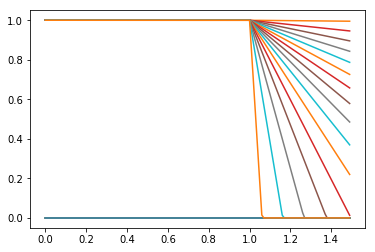

In [135]:
t_s = np.arange(0, 1.5, 0.01)
boundary = np.zeros((len(t_s),2))

a = 1
node = 1
for a in range(1, 2, 1):
    for theta in np.arange(0.01, (1/2 * np.pi), 0.1):
        cnt = 0
        for i in t_s:
            b = a + linear_collapse(t = i, node = node, theta = theta)
            if b <= 0:
                boundary[cnt, 1] = 0
                boundary[cnt, 0] = 0
            else: 
                boundary[cnt, 1] = b
                boundary[cnt, 0] = 0 #- boundary[cnt, 0]
            cnt += 1

        plt.plot(t_s, boundary[:, 0])
        plt.plot(t_s, boundary[:, 1]) 

In [53]:
def logistic_bound(t = 1,
                   node = 1,
                   k = 1,
                   midpoint = 1,
                   max_val  = 3):
    
    return - (max_val / (1 + np.exp(- k * ((t - midpoint)))))


In [45]:
logistic_bound(t = 1.0, node = 1.0, midpoint = 3, k = 1)

-0.04742587317756678

In [22]:
np.exp(-1)

0.36787944117144233

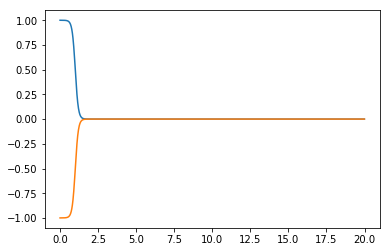

In [59]:
t_s = np.arange(0, 20, 0.01)
boundary = np.zeros((len(t_s),2))

a = 1
node = 1
for a in range(1, 2, 1):
    for midpoint in np.arange(1, 2, 1):
        cnt = 0
        for i in t_s:
            b = a + logistic_bound(t = i, node = 1, k = 10, midpoint = 2, max_val = a)
            if b <= 0:
                boundary[cnt, 0] = 0
                boundary[cnt, 1] = 0
            else: 
                boundary[cnt, 0] = b
                boundary[cnt, 1] = - boundary[cnt, 0]
            cnt += 1

        plt.plot(t_s, boundary[:, 0])
        plt.plot(t_s, boundary[:, 1]) 

In [97]:
# Generalized logistic bound
def generalized_logistic_bnd(t = 1, 
                             B = 2.,
                             M = 3.,
                             v = 0.5):
    return 1 - (1 / np.power(1 + np.exp(- B * (t - M)), 1 / v))

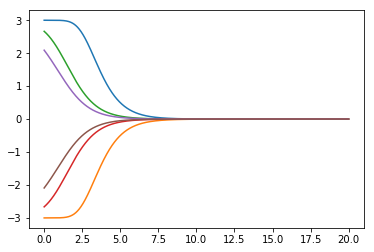

In [126]:
t_s = np.arange(0, 20, 0.01)
boundary = np.zeros((len(t_s),2))

a = 3
node = 1
for v in np.arange(0.1, 1.11, 0.5):
    for B in np.arange(3, 4, 1):
        cnt = 0
        for i in t_s:
            b = a * generalized_logistic_bnd(t = i,
                                             B = 1,
                                             v = v, 
                                             M = 1)   #B = B)
            #print(b)
            if b <= 0:
                boundary[cnt, 0] = 0
                boundary[cnt, 1] = 0
            else: 
                boundary[cnt, 0] = b
                boundary[cnt, 1] = - boundary[cnt, 0]
            cnt += 1

        plt.plot(t_s, boundary[:, 0])
        plt.plot(t_s, boundary[:, 1]) 

In [122]:
np.power(1/2,  - 1. / 0.1)

1024.0

In [79]:
np.power(3, 2)

9

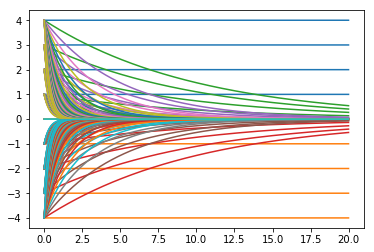

In [63]:
t_s = np.arange(0, 20, 0.01)
boundary = np.zeros((len(t_s),2))

a = 0.5
for a in range(0, 5, 1):
    for c2 in np.arange(0, 3, 0.1):
        cnt = 0
        for i in t_s:
            boundary[cnt, 0] = a * exp_c1_c2(t = i,
                                             c1 = 0,
                                             c2 = c2)
            boundary[cnt, 1] = - boundary[cnt, 0]
            cnt += 1

        plt.plot(t_s, boundary[:, 0])
        plt.plot(t_s, boundary[:, 1])   


In [136]:
my_samples_flexb  = ddm_sim.ddm_flexbound_simulate(v = 0.5,
                                                   a = 2,
                                                   w = 0.5, 
                                                   s = 1,
                                                   delta_t = 0.001,
                                                   max_t = 20,
                                                   n_samples = 1000,
                                                   print_info = True,
                                                   boundary_fun = linear_collapse,
                                                   boundary_multiplicative = False,
                                                   boundary_params = {'node': 0.1, 'theta': 1}
                                                   )

0  datapoints sampled


(-5, 5)

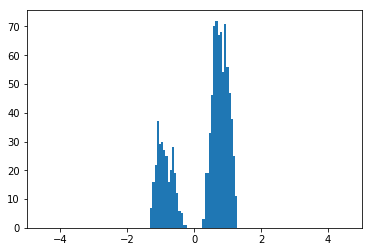

In [137]:
plt.hist(my_samples_flexb[0] * my_samples_flexb[1], bins = 40)
plt.xlim((-5, 5))